## Apply UMAP to try to better assess the intrinsic dimensionality of the data 



In [22]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from os.path import join as pjoin
from scipy.spatial.distance import pdist
from sklearn import neighbors
from scipy.io import loadmat
from scipy.stats import zscore 
from sklearn.datasets import load_digits

from sklearn.decomposition import PCA,KernelPCA
import umap

# sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


In [23]:
# Nice and hard-coded paths
data_path = '/Users/joshstern/Documents/UchidaLab_NeuralData/patch_foraging_neuropix/josh/manifolds/spud_code/data'
synth1d_dataset = pjoin(data_path,'1D_synth.mat')
synth2d_dataset = pjoin(data_path,'2D_synth.mat')
synth3d_dataset = pjoin(data_path,'3D_synth.mat')


### First check out on MNIST

In [23]:
# pca, then kpca, then umap
X, y = load_digits(return_X_y=True)

n_components = 2

# first PCA
pca_transformer = PCA(n_components = n_components)
X_transformed_pca = pca_transformer.fit_transform(X)
# pca_expl_var = pca.explained_variance_ratio_

# then kPCA
kpca_transformer = KernelPCA(n_components = n_components, kernel='rbf')
X_transformed_kpca = kpca_transformer.fit_transform(X)

# last, UMAP
umap_transformer = umap.UMAP(n_components = 2,n_neighbors = 15,random_state=42)
X_transformed_umap = umap_transformer.fit_transform(X)


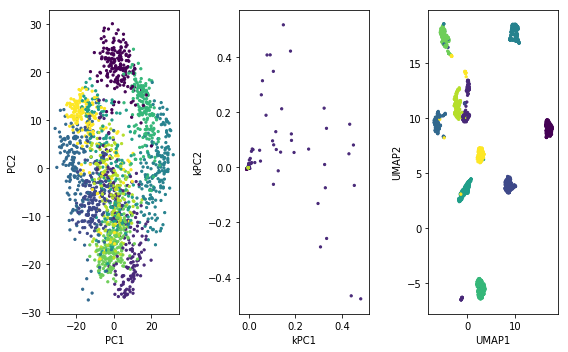

In [24]:
# Visualize what the different algorithms do 
fig,ax = plt.subplots(1,3,figsize = (8,5))
ax[0].scatter(X_transformed_pca[:,0],X_transformed_pca[:,1],c = y,s = 5)
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[1].scatter(X_transformed_kpca[:,0],X_transformed_kpca[:,1],c = y,s = 5)
ax[1].set_xlabel("kPC1")
ax[1].set_ylabel("kPC2")
ax[2].scatter(X_transformed_umap[:,0],X_transformed_umap[:,1],c = y,s = 5)
ax[2].set_xlabel("UMAP1")
ax[2].set_ylabel("UMAP2")
fig.tight_layout()

### First test out on our synthethic data

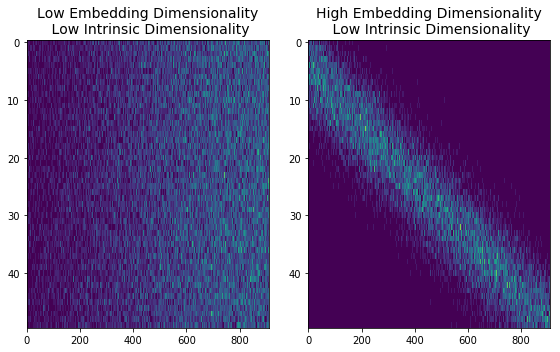

In [100]:
# Load synthetic data
synth1d = loadmat(synth1d_dataset)    
# Load the 1d intrinsic manifold data 
X_highEmbedding = synth1d['X_highEmbedding']
X_lowEmbedding = synth1d['X_lowEmbedding']
S = synth1d['S'] # .T.reshape((X_highEmbedding.shape[1] * X_highEmbedding.shape[2],1))

synth2d = loadmat(synth2d_dataset)
X_highEmbed_2d = synth2d['X_highEmbedding_2D']
S1 = synth2d['S1']
S2 = synth2d['S2']

synth3d = loadmat(synth3d_dataset)
X_highEmbed_3d = synth3d['X_highEmbedding_3D']
S1 = synth3d['S1']
S2 = synth3d['S2']
S3 = synth3d['S3']

# define variable to decode

# which data to use in form [n_cells n_timepoints]
X = X_highEmbedding.reshape((X_highEmbedding.shape[0],(X_highEmbedding.shape[1] * X_highEmbedding.shape[2]))).T
# X_3d = X_highEmbedding
# X = X_3d.reshape((X_3d.shape[0],(X_3d.shape[1] * X_3d.shape[2]))).T

# X = zscore(X)

visualization = True
if visualization == True:
    fig,ax = plt.subplots(1,2,figsize = (8,5))
#     ax[0].imshow(np.mean(X_lowEmbedding,axis = 2))
#     ax[1].imshow(np.mean(X_highEmbedding,axis = 2))
    ax[0].imshow(X_lowEmbedding.reshape((X_highEmbedding.shape[0],(X_highEmbedding.shape[1] * X_highEmbedding.shape[2]))),aspect = 'auto')
    ax[1].imshow(X_highEmbedding.reshape((X_highEmbedding.shape[0],(X_highEmbedding.shape[1] * X_highEmbedding.shape[2]))),aspect = 'auto')
    ax[0].set_title("Low Embedding Dimensionality\n Low Intrinsic Dimensionality",fontsize = 14)
    ax[1].set_title("High Embedding Dimensionality\n Low Intrinsic Dimensionality",fontsize = 14)
    
    fig.tight_layout()
    
    

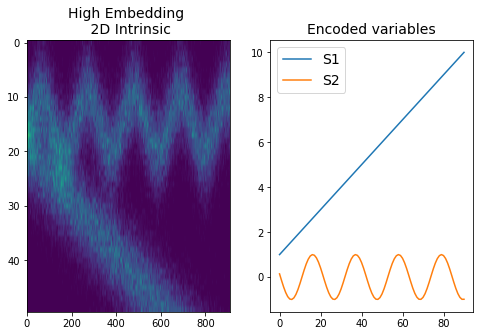

In [312]:
fig,ax = plt.subplots(1,2,figsize = (8,5))
ax[0].imshow(X_highEmbed_2d.reshape((X_highEmbedding.shape[0],(X_highEmbedding.shape[1] * X_highEmbedding.shape[2]))),aspect = 'auto')
ax[0].set_title("High Embedding \n 2D Intrinsic",fontsize = 14)
ax[1].plot(S1[0,:],label = "S1")
ax[1].plot(S2[0,:],label = "S2")
ax[1].set_title("Encoded variables",fontsize = 14)
ax[1].legend(fontsize = 14)


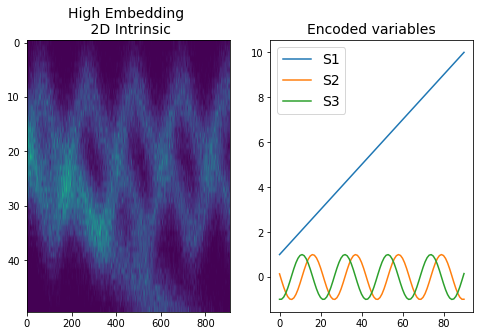

In [313]:
fig,ax = plt.subplots(1,2,figsize = (8,5))
ax[0].imshow(X_highEmbed_3d.reshape((X_highEmbedding.shape[0],(X_highEmbedding.shape[1] * X_highEmbedding.shape[2]))),aspect = 'auto')
ax[0].set_title("High Embedding \n 2D Intrinsic",fontsize = 14)
ax[1].plot(S1[0,:],label = "S1")
ax[1].plot(S2[0,:],label = "S2")
ax[1].plot(S3[0,:],label = "S3")
ax[1].set_title("Encoded variables",fontsize = 14)
ax[1].legend(fontsize = 14)


In [57]:
# Check out 1D
n_components = 1
pca_transformer = PCA(n_components = n_components)
X_transformed_pca = pca_transformer.fit_transform(X)

umap_transformer = umap.UMAP(n_components = n_components,n_neighbors = 60,random_state=42)
X_transformed_umap = umap_transformer.fit_transform(X)


In [63]:
S[:].shape

(10, 91)

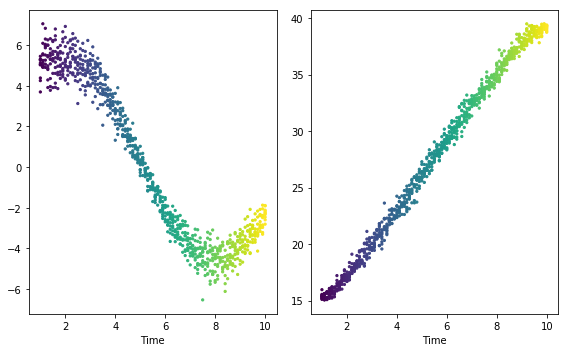

In [67]:
fig,ax = plt.subplots(1,2,figsize = (8,5))
ax[0].scatter(S.T,X_transformed_pca,c = S.T,s = 5)
ax[0].set_xlabel("Time")
ax[1].scatter(S.T,X_transformed_umap,c = S.T,s = 5)
ax[1].set_xlabel("Time")
fig.tight_layout()

In [98]:
# Now fit pca, kernelPCA, and UMAP
n_components = 2

# first PCA
pca_transformer = PCA(n_components = n_components)
X_transformed_pca = pca_transformer.fit_transform(X)
# pca_expl_var = pca.explained_variance_ratio_

# then kPCA
kpca_transformer = KernelPCA(n_components = n_components, kernel='rbf')
X_transformed_kpca = kpca_transformer.fit_transform(X)

# last, UMAP
umap_transformer = umap.UMAP(n_components = n_components,n_neighbors = 50,random_state=42)
X_transformed_umap = umap_transformer.fit_transform(X)

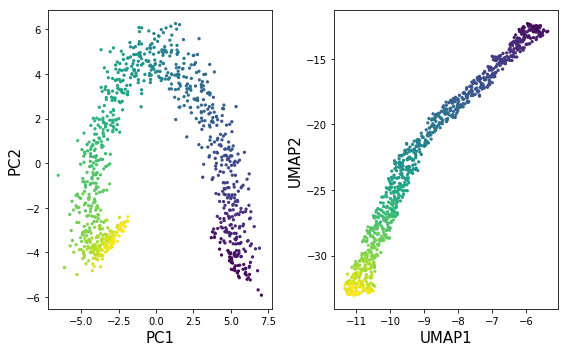

In [99]:
# Visualize what the different algorithms do 
fig,ax = plt.subplots(1,2,figsize = (8,5))
ax[0].scatter(X_transformed_pca[:,0],X_transformed_pca[:,1],c = S.T.flatten(),s = 5)
ax[0].set_xlabel("PC1",fontsize = 15)
ax[0].set_ylabel("PC2",fontsize = 15)
# ax[1].scatter(X_transformed_kpca[:,0],X_transformed_kpca[:,1],c = S,s = 5)
# ax[1].set_xlabel("kPC1")
# ax[1].set_ylabel("kPC2")
ax[1].scatter(X_transformed_umap[:,0],X_transformed_umap[:,1],c = S.T.flatten(),s = 5)
ax[1].set_xlabel("UMAP1",fontsize = 15)
ax[1].set_ylabel("UMAP2",fontsize = 15)
fig.tight_layout()

In [89]:
X_transformed_umap.shape

(910, 2)

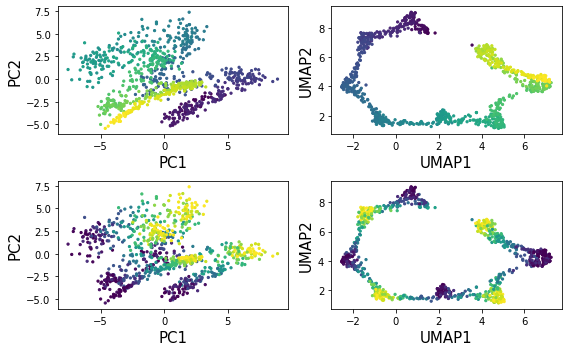

In [298]:
# Visualize what the different algorithms do 
fig,ax = plt.subplots(2,2,figsize = (8,5))
ax[0,0].scatter(X_transformed_pca[:,0],X_transformed_pca[:,1],c = S1.T,s = 5)
ax[0,0].set_xlabel("PC1",fontsize = 15)
ax[0,0].set_ylabel("PC2",fontsize = 15)
# ax[1].scatter(X_transformed_kpca[:,0],X_transformed_kpca[:,1],c = S,s = 5)
# ax[1].set_xlabel("kPC1")
# ax[1].set_ylabel("kPC2")
ax[0,1].scatter(X_transformed_umap[:,0],X_transformed_umap[:,1],c = S1.T,s = 5)
ax[0,1].set_xlabel("UMAP1",fontsize = 15)
ax[0,1].set_ylabel("UMAP2",fontsize = 15)
ax[1,0].scatter(X_transformed_pca[:,0],X_transformed_pca[:,1],c = S2.T,s = 5)
ax[1,0].set_xlabel("PC1",fontsize = 15)
ax[1,0].set_ylabel("PC2",fontsize = 15)
# ax[1].scatter(X_transformed_kpca[:,0],X_transformed_kpca[:,1],c = S,s = 5)
# ax[1].set_xlabel("kPC1")
# ax[1].set_ylabel("kPC2")
ax[1,1].scatter(X_transformed_umap[:,0],X_transformed_umap[:,1],c = S2.T,s = 5)
ax[1,1].set_xlabel("UMAP1",fontsize = 15)
ax[1,1].set_ylabel("UMAP2",fontsize = 15)
fig.tight_layout()

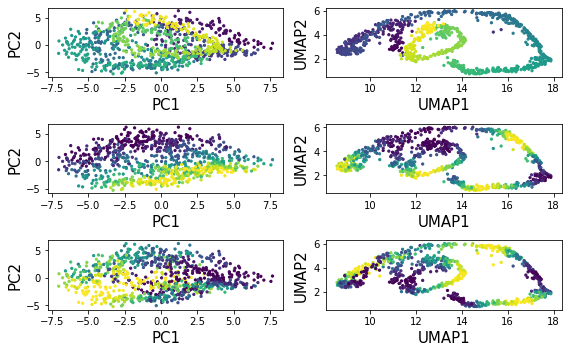

In [316]:
# Visualize what the different algorithms do 
fig,ax = plt.subplots(3,2,figsize = (8,5))
ax[0,0].scatter(X_transformed_pca[:,0],X_transformed_pca[:,1],c = S1.T,s = 5)
ax[0,0].set_xlabel("PC1",fontsize = 15)
ax[0,0].set_ylabel("PC2",fontsize = 15)
ax[0,1].scatter(X_transformed_umap[:,0],X_transformed_umap[:,1],c = S1.T,s = 5)
ax[0,1].set_xlabel("UMAP1",fontsize = 15)
ax[0,1].set_ylabel("UMAP2",fontsize = 15)
ax[1,0].scatter(X_transformed_pca[:,0],X_transformed_pca[:,1],c = S2.T,s = 5)
ax[1,0].set_xlabel("PC1",fontsize = 15)
ax[1,0].set_ylabel("PC2",fontsize = 15)
ax[1,1].scatter(X_transformed_umap[:,0],X_transformed_umap[:,1],c = S2.T,s = 5)
ax[1,1].set_xlabel("UMAP1",fontsize = 15)
ax[1,1].set_ylabel("UMAP2",fontsize = 15)
ax[2,0].scatter(X_transformed_pca[:,0],X_transformed_pca[:,1],c = S3.T,s = 5)
ax[2,0].set_xlabel("PC1",fontsize = 15)
ax[2,0].set_ylabel("PC2",fontsize = 15)
ax[2,1].scatter(X_transformed_umap[:,0],X_transformed_umap[:,1],c = S3.T,s = 5)
ax[2,1].set_xlabel("UMAP1",fontsize = 15)
ax[2,1].set_ylabel("UMAP2",fontsize = 15)
fig.tight_layout()

In [80]:
def var_expl(X,Y):
    """
        Calculate proportion variance in X explained by variance in Y
    """
    X = X - np.mean(X,1)[:,np.newaxis]
    Y = Y - np.mean(Y,1)[:,np.newaxis]
    X_2 = np.mean(np.linalg.norm(X,2,axis = 1))**2
    X_minus_Y_2 = np.mean(np.linalg.norm(X - Y,2,axis = 1))**2
    return (X_2 - X_minus_Y_2) / X_2
    

In [81]:
# Now look at variance explained
# Now fit pca, kernelPCA, and UMAP
max_n_components = 10

# first PCA
pca_expl_var = []
for n_components in range(1,max_n_components):
    pca_transformer = PCA(n_components = n_components)
    X_transformed_pca = pca_transformer.fit_transform(X)
    X_reconstr_pca = pca_transformer.inverse_transform(X_transformed_pca)
    this_var_expl = var_expl(X,X_reconstr_pca)
    pca_expl_var.append(this_var_expl)
    
# check against sklearn calculation
pca_transformer = PCA(n_components = max_n_components)
X_transformed_pca = pca_transformer.fit_transform(X)
pca_expl_var_sklearn = pca_transformer.explained_variance_ratio_

# then kPCA
kpca_expl_var = []
for n_components in range(1,max_n_components):
    kpca_transformer = KernelPCA(n_components = n_components, kernel='linear', fit_inverse_transform = True)
    X_transformed_kpca = kpca_transformer.fit_transform(X)
    X_reconstr_kpca = kpca_transformer.inverse_transform(X_transformed_kpca)
    this_var_expl = var_expl(X,X_reconstr_kpca)
    kpca_expl_var.append(this_var_expl)

Text(0, 0.5, 'Model proportion variance explained')

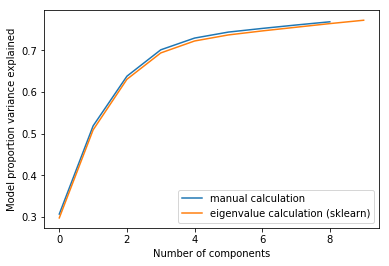

In [82]:
# Check on variance explained calculation
plt.plot(pca_expl_var,label = "manual calculation")
plt.plot(np.cumsum(pca_expl_var_sklearn),label = "eigenvalue calculation (sklearn)")
plt.legend()
plt.xlabel("Number of components")
plt.ylabel("Model proportion variance explained")

In [96]:
umap.UMAP()

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [97]:
# separate UMAP because it is going to take a good deal longer 
umap_expl_var = []
for n_components in range(2,4):
    umap_transformer = umap.UMAP(n_components = n_components,n_neighbors = 50,random_state=42)
    X_transformed_umap = umap_transformer.fit_transform(X)
    X_reconstr_umap = umap_transformer.inverse_transform(X_transformed_umap)
    this_var_expl = var_expl(X,X_reconstr_umap)
    
    umap_expl_var.append(this_var_expl)
    print("%i components %.5f var_expl"%(n_components,this_var_expl))

2 components -3.29564 var_expl


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (5,) and (3,)

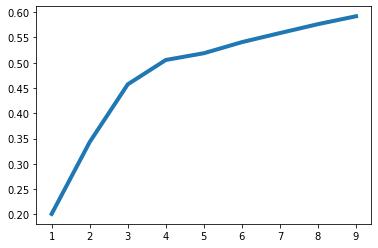

In [324]:
# variance explained
plt.figure()
plt.plot(np.arange(1,max_n_components),pca_expl_var,linewidth = 4,label = "PCA")
plt.plot(np.arange(2,7),umap_expl_var,linewidth = 4,label = "UMAP")
plt.xlabel("Model # Dimensions",fontsize = 15)
plt.ylabel(r"Proportion variance explained",fontsize = 15)
plt.legend()
plt.ylim([0,1])

In [26]:
X.shape

(910, 50)

In [103]:
# # Now show UMAP vs PCA reconstructions
# n_components = 2

# # pca
# pca_transformer = PCA(n_components = n_components)
# X_transformed_pca = pca_transformer.fit_transform(X)
# X_reconstr_pca = pca_transformer.inverse_transform(X_transformed_pca)
# var_expl_pca2 = var_expl(X,X_reconstr_pca)

# UMAP
umap_transformer = umap.UMAP(n_components = n_components,n_neighbors = 15,random_state=42)
X_transformed_umap = umap_transformer.fit_transform(X)
X_reconstr_umap = umap_transformer.inverse_transform(X_transformed_umap)
var_expl_umap2 = var_expl(X,X_reconstr_umap)

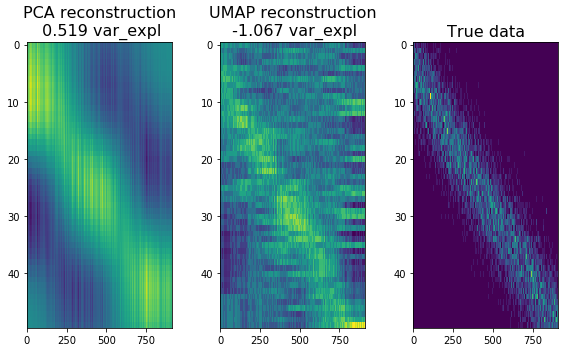

In [104]:
# For each, show what reconstruction looks like with 2 components
fig,ax = plt.subplots(1,3,figsize = (8,5))
ax[0].imshow(X_reconstr_pca.T,aspect = 'auto')
ax[0].set_title("PCA reconstruction\n %.3f var_expl"%var_expl_pca2,fontsize = 16)
ax[1].imshow(X_reconstr_umap.T,aspect = 'auto')
ax[1].set_title("UMAP reconstruction\n %.3f var_expl"%var_expl_umap2,fontsize = 16)
ax[2].imshow(X.T,aspect = 'auto')
ax[2].set_title("True data",fontsize = 16)
fig.tight_layout()

In [93]:
X_transformed_umap.shape

(910, 2)

In [341]:
X_3d.shape

(50, 91, 10)

In [412]:
# Calculate variance variance explained on heldout data
n_component_range = np.array([2,3])
train_frac = .5

n_trials = X_3d.shape[2]
n_trials_train = np.round(train_frac * n_trials).astype(int)

n_runs = 2

pca_var_expl_test = np.zeros((n_runs,len(n_component_range)))
pca_var_expl_train = np.zeros((n_runs,len(n_component_range)))
umap_var_expl_test = np.zeros((n_runs,len(n_component_range)))
umap_var_expl_train = np.zeros((n_runs,len(n_component_range)))

for i_run in range(n_runs):
    # randomly select train and test indices
    train_idx = np.random.choice(n_trials, size = n_trials_train, replace=False)
    test_idx = np.array([idx for idx in range(n_trials) if idx not in train_idx])
    
    # collect data and average as we will w/ real data
    X_train = zscore(np.mean(X_3d[:,:,train_idx],axis = 2),axis = 0)
    X_test = zscore(np.mean(X_3d[:,:,test_idx],axis = 2),axis = 0)
    
    for i_n_components in range(len(n_component_range)):
        n_components = n_component_range[i_n_components]
        
        # pca
        pca_transformer = PCA(n_components = n_components)
        pca_transformer.fit(X_train)
        X_train_transformed = pca_transformer.transform(X_train)
        X_train_reconstr_pca = pca_transformer.inverse_transform(X_train_transformed)
        X_test_transformed = pca_transformer.transform(X_test)
        X_test_reconstr_pca = pca_transformer.inverse_transform(X_test_transformed)
        this_var_expl_test = var_expl(X_test,X_test_reconstr_pca)
        this_var_expl_train = var_expl(X_train,X_train_reconstr_pca)
        pca_var_expl_test[i_run,i_n_components] = this_var_expl_test
        pca_var_expl_train[i_run,i_n_components] = this_var_expl_train
        
        # then umap
        umap_transformer = umap.UMAP(n_components = n_components,n_neighbors = 3,random_state=42)
        umap_transformer.fit(X_train)
        X_train_transformed = umap_transformer.transform(X_train)
        X_train_reconstr_umap = umap_transformer.inverse_transform(X_train_transformed)
        X_test_transformed = umap_transformer.transform(X_test)
        X_test_reconstr_umap = umap_transformer.inverse_transform(X_test_transformed)
        this_var_expl_test = var_expl(X_test,X_test_reconstr_umap)
        this_var_expl_train = var_expl(X_train,X_train_reconstr_umap)
        umap_var_expl_test[i_run,i_n_components] = this_var_expl_test
        umap_var_expl_train[i_run,i_n_components] = this_var_expl_train
    

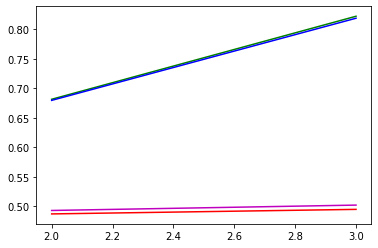

In [418]:
# Figure 3c/g from Geometry of Abstract Learned Knowledge
plt.plot(n_component_range,pca_var_expl_train.mean(axis = 0),color = 'g')
plt.plot(n_component_range,umap_var_expl_train.mean(axis = 0),color = 'm')

plt.plot(n_component_range,pca_var_expl_test.mean(axis = 0),color = 'b')
plt.plot(n_component_range,umap_var_expl_test.mean(axis = 0),color = 'r')


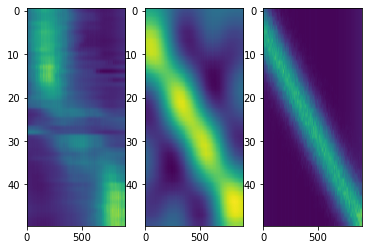

In [419]:
fig,ax = plt.subplots(1,3)
ax[0].imshow(X_test_reconstr_umap,aspect = 'auto')
ax[1].imshow(X_test_reconstr_pca,aspect = 'auto')
ax[2].imshow(X_test,aspect = 'auto')

maybe not enough noise? wtf... 

## Ok let's get into the real neural data now!